In [1]:
import numpy as np
import matplotlib.pyplot as plt 


def my_func(x):
    return np.sin(x)


# 전방 차분
def forward_difference(f, x, h=1e-5):
    return (f(x+h) - f(x)) / h  


# 후방 차분
def backward_difference(f, x, h=1e-5):
    return (f(x) - f(x - h)) / h


# 중앙 차분
def central_difference(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)


# 이차 전방 차분
def second_forward_difference(f, x, h=1e-5):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)


# 이차 후방 차분
def second_backward_difference(f, x, h=1e-5):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

In [2]:
def differentiate(f, x, h):
    y_diff = np.zeros_like(x)

    for i in range(0, len(x)):
        
        if i == 0: 
            y_diff[i] = second_forward_difference(f, x[i], h)
        elif i == len(x) - 1: 
            y_diff[i] = second_backward_difference(f, x[i], h)
        else:
            y_diff[i] = central_difference(f, x[i], h)
    
    return y_diff


def plot_graphs(x, y_true, h_values):
    plt.figure(figsize=(8, 6), dpi=300)
    plt.plot(x, y_true, label='True Value')
    for h in h_values:
        y_diff = differentiate(my_func, x, h)
        plt.plot(x, y_diff, label=f'h = {h}')
    plt.xlabel('x')
    plt.ylabel('dy/dx')
    plt.title('First Derivative Approximation')
    plt.legend()
    plt.grid(True)
    plt.show()

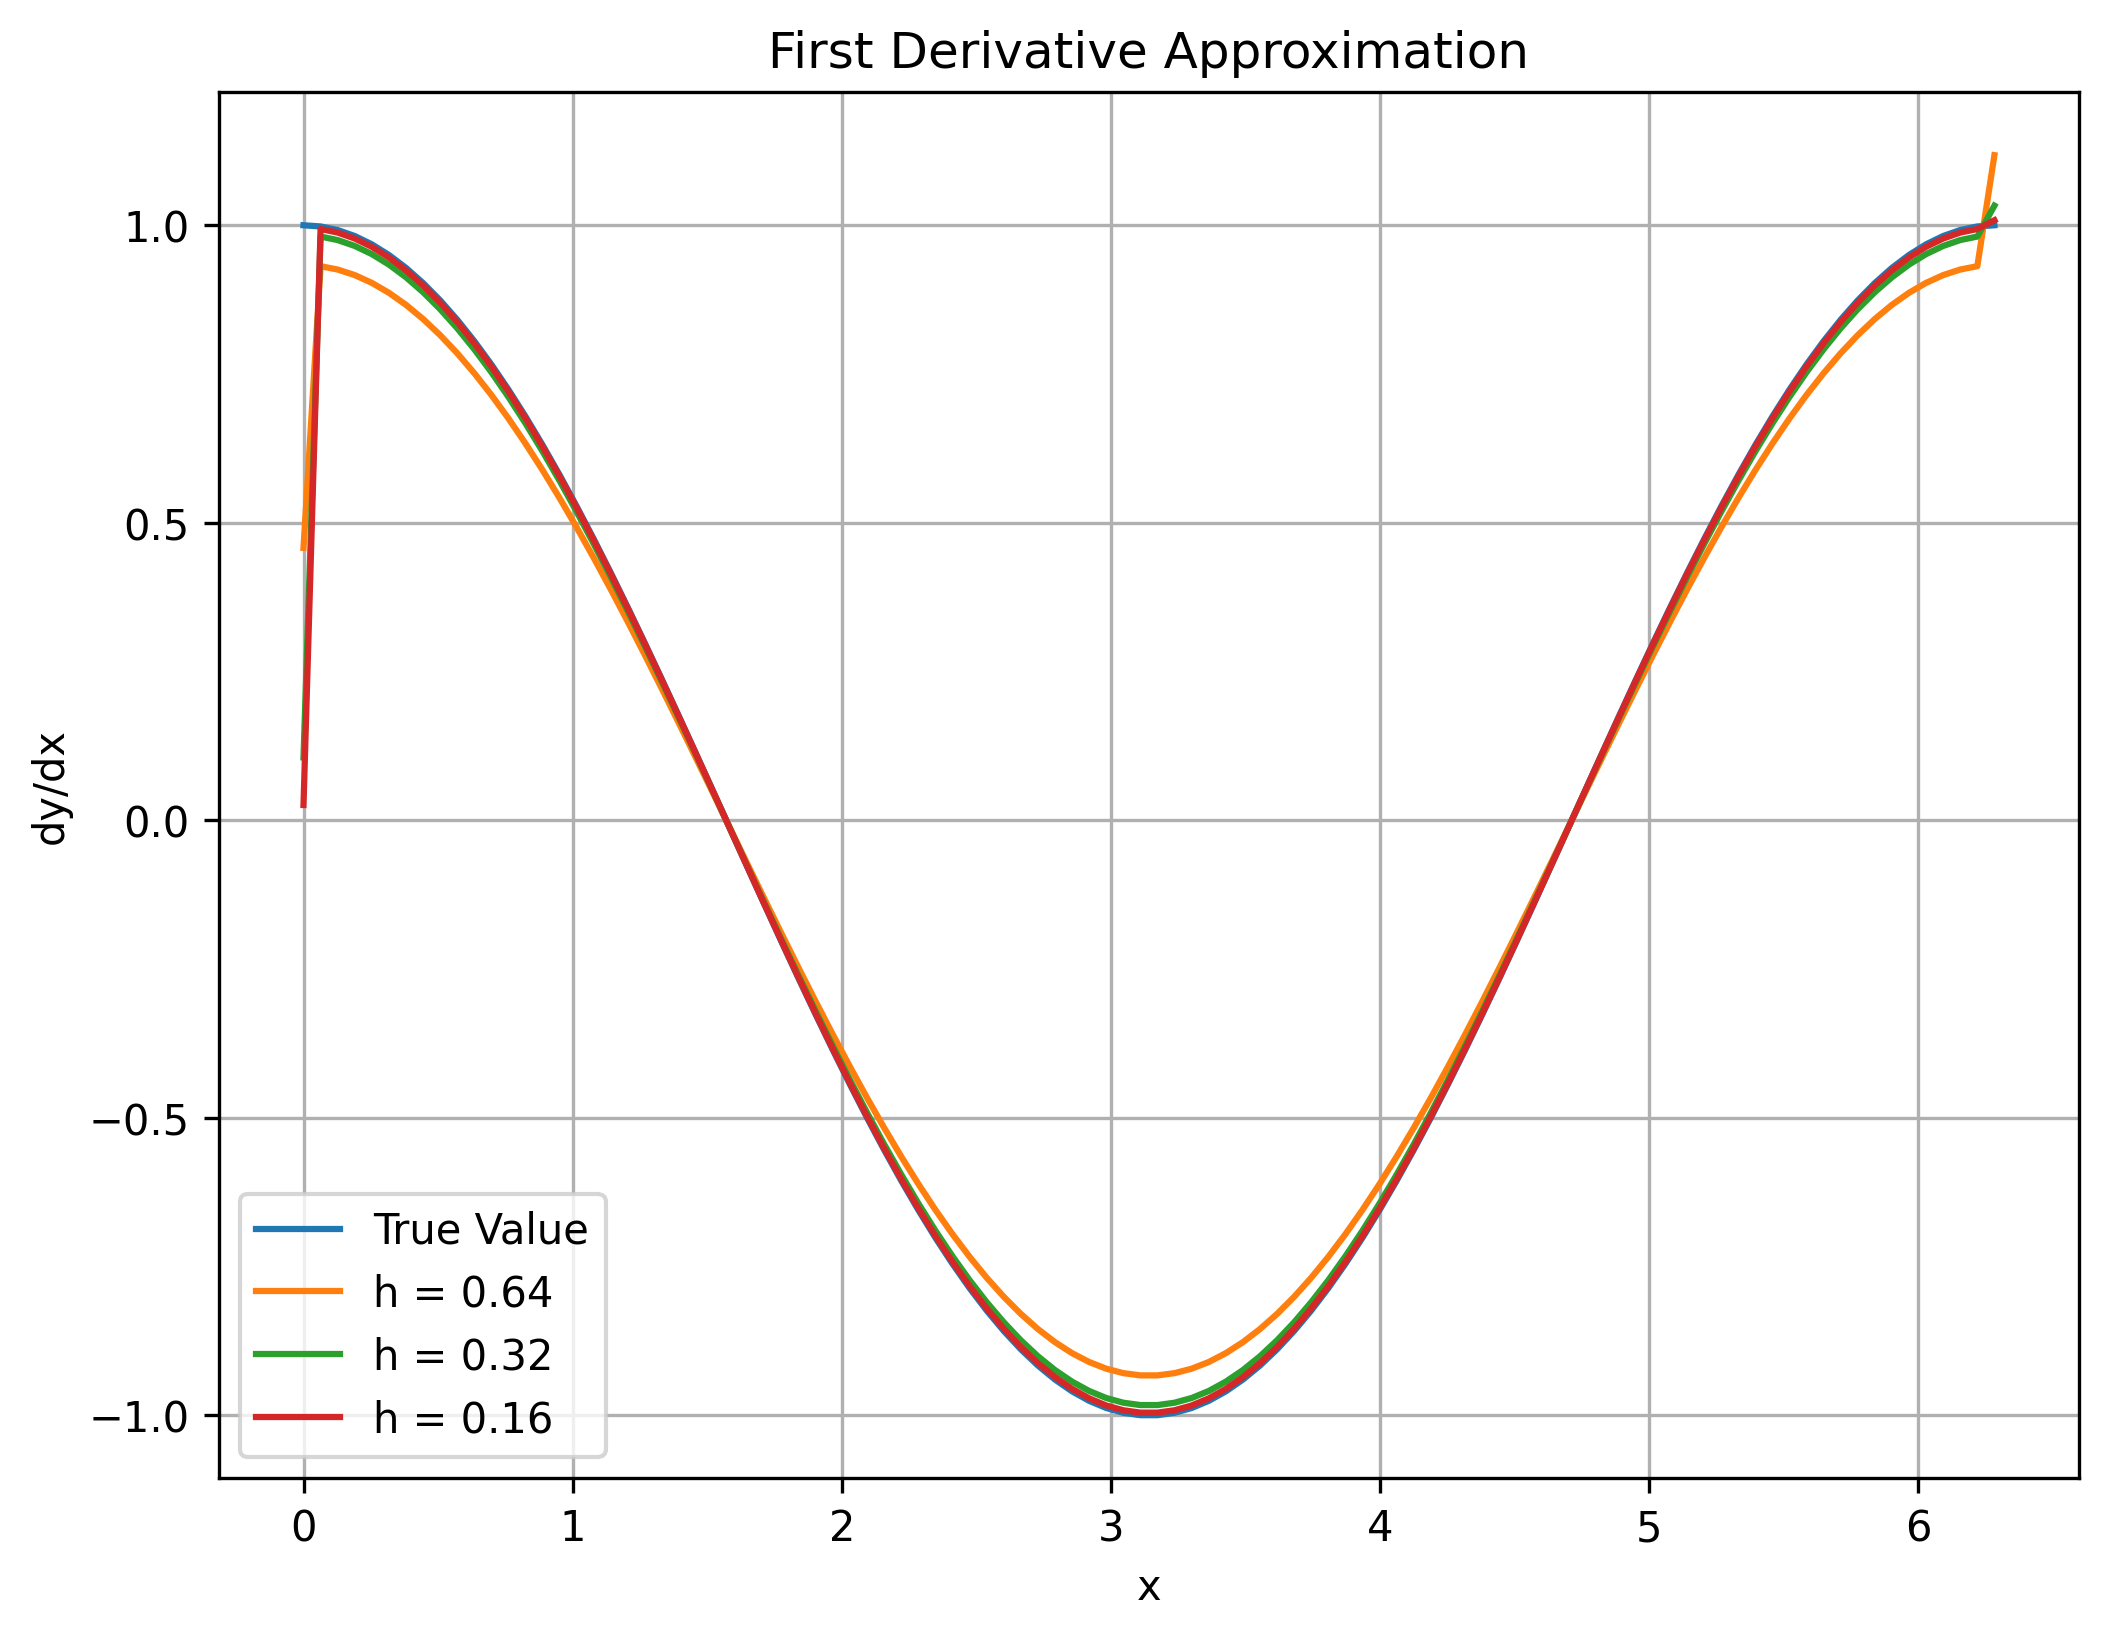

In [3]:
x = np.linspace(0, 2 * np.pi, 100)
y_true = np.cos(x)
h_values = [0.64, 0.32, 0.16]
plot_graphs(x, y_true, h_values)